<a href="https://colab.research.google.com/github/aditya-167/TradingBot/blob/main/Copy_of_CS435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
import pickle
import numpy as np
import pandas as pd
from pandas.core.window.expanding import Axis
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [263]:
#get particular stock index value
stock_iter = 6
training_object = open("/content/drive/MyDrive/CS435/datasets/training_set.pkl", "rb")
training_df = pickle.load(training_object)
stock_df = training_df[stock_iter] #taking the first table in the array as of now.

In [264]:
stock_df['Close_pct_change'] = stock_df['Close'].pct_change()

In [265]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change
0,0.889008,0.895095,0.878625,0.880654,0.285849,NaN
1,0.879162,0.883876,0.867811,0.881847,0.169439,0.001355
2,0.879520,0.891395,0.877312,0.885846,0.183706,0.004534
3,0.885070,0.885070,0.878744,0.884712,0.203113,-0.001280
4,0.884592,0.894379,0.881728,0.894259,0.159943,0.010792
...,...,...,...,...,...,...
2197,0.596849,0.597088,0.590047,0.590047,0.092391,-0.009814
2198,0.590405,0.592195,0.587898,0.591956,0.089922,0.003236
2199,0.592314,0.593508,0.588256,0.588972,0.139724,-0.005040
2200,0.589450,0.589450,0.584795,0.586347,0.184605,-0.004458


In [266]:
stock_df = stock_df.dropna()

In [267]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change
1,0.879162,0.883876,0.867811,0.881847,0.169439,0.001355
2,0.879520,0.891395,0.877312,0.885846,0.183706,0.004534
3,0.885070,0.885070,0.878744,0.884712,0.203113,-0.001280
4,0.884592,0.894379,0.881728,0.894259,0.159943,0.010792
5,0.893901,0.896169,0.890560,0.895095,0.171079,0.000934
...,...,...,...,...,...,...
2197,0.596849,0.597088,0.590047,0.590047,0.092391,-0.009814
2198,0.590405,0.592195,0.587898,0.591956,0.089922,0.003236
2199,0.592314,0.593508,0.588256,0.588972,0.139724,-0.005040
2200,0.589450,0.589450,0.584795,0.586347,0.184605,-0.004458


In [268]:
stock_df['Close_pct_change'].describe()

count    2201.000000
mean       -0.000165
std         0.006909
min        -0.049761
25%        -0.003588
50%        -0.000144
75%         0.003270
max         0.066679
Name: Close_pct_change, dtype: float64

### Close percentage change categories

In [269]:
bin_labels = ["decrease", "no big change", "increase"]
stock_df['Close_pct_change_range'] = pd.qcut(stock_df['Close_pct_change'], q=3)
stock_df['Close_pct_change_category'] = pd.qcut(stock_df['Close_pct_change'], q=3,labels=bin_labels)
stock_df

<ipython-input-269-8fc8cac91a6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Close_pct_change_range'] = pd.qcut(stock_df['Close_pct_change'], q=3)
<ipython-input-269-8fc8cac91a6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Close_pct_change_category'] = pd.qcut(stock_df['Close_pct_change'], q=3,labels=bin_labels)


,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category
1,0.879162,0.883876,0.867811,0.881847,0.169439,0.001355,"(-0.00234, 0.00186]",no big change
2,0.879520,0.891395,0.877312,0.885846,0.183706,0.004534,"(0.00186, 0.0667]",increase
3,0.885070,0.885070,0.878744,0.884712,0.203113,-0.001280,"(-0.00234, 0.00186]",no big change
4,0.884592,0.894379,0.881728,0.894259,0.159943,0.010792,"(0.00186, 0.0667]",increase
5,0.893901,0.896169,0.890560,0.895095,0.171079,0.000934,"(-0.00234, 0.00186]",no big change
...,...,...,...,...,...,...,...,...
2197,0.596849,0.597088,0.590047,0.590047,0.092391,-0.009814,"(-0.0508, -0.00234]",decrease
2198,0.590405,0.592195,0.587898,0.591956,0.089922,0.003236,"(0.00186, 0.0667]",increase
2199,0.592314,0.593508,0.588256,0.588972,0.139724,-0.005040,"(-0.0508, -0.00234]",decrease
2200,0.589450,0.589450,0.584795,0.586347,0.184605,-0.004458,"(-0.0508, -0.00234]",decrease


### Range of the each close percentage categories

In [270]:
print("Ranges for the categories \n"+str(stock_df['Close_pct_change_range'].value_counts().keys()[0])+"\n"+
str(stock_df['Close_pct_change_range'].value_counts().keys()[1])+"\n"+
str(stock_df['Close_pct_change_range'].value_counts().keys()[2]))

Ranges for the categories 
(-0.0508, -0.00234]
(0.00186, 0.0667]
(-0.00234, 0.00186]


In [271]:
def addTI(df,lag=5):
  short_w = [5,8,13,26,44,50,75,100,150]
  long_w = [12,19,26,44,75,100,125,200,300]
  data = df.copy()
  features = []
  for x,y in zip(short_w,long_w):
    data["SMA_diff_"+str(x)+"_"+str(y)] = data.Close.rolling(x).mean() - data.Close.rolling(y).mean()
    features.append("SMA_diff_"+str(x)+"_"+str(y))
  for x in (short_w+long_w):
    data["Boll_"+str(x)] = (data.Close - data.Close.rolling(x).mean())/data.Close.rolling(x).std() 
    features.append("Boll_"+str(x))
    data["Min_"+str(x)] = data.Close.rolling(x).min()/data.Close -1 
    features.append("Min_"+str(x))
    data["Max_"+str(x)] =  data.Close.rolling(x).max()/data.Close -1  
    features.append("Max_"+str(x))
    data["Mom_"+str(x)] = data.Close_pct_change.rolling(x).mean()
    features.append("Mom_"+str(x))
    data["Vol_"+str(x)] = data.Close_pct_change.rolling(x).std()
    features.append("Vol_"+str(x))
  
  for f in features:
    col = "{}_lag_{}".format(f,lag)
    data[col] = data[f].shift(lag)

  data.dropna(inplace=True)
  return data

In [272]:
stock_df = addTI(stock_df,lag=21)

<ipython-input-271-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-271-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-271-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

<Axes: title={'center': 'Feature Plot'}>

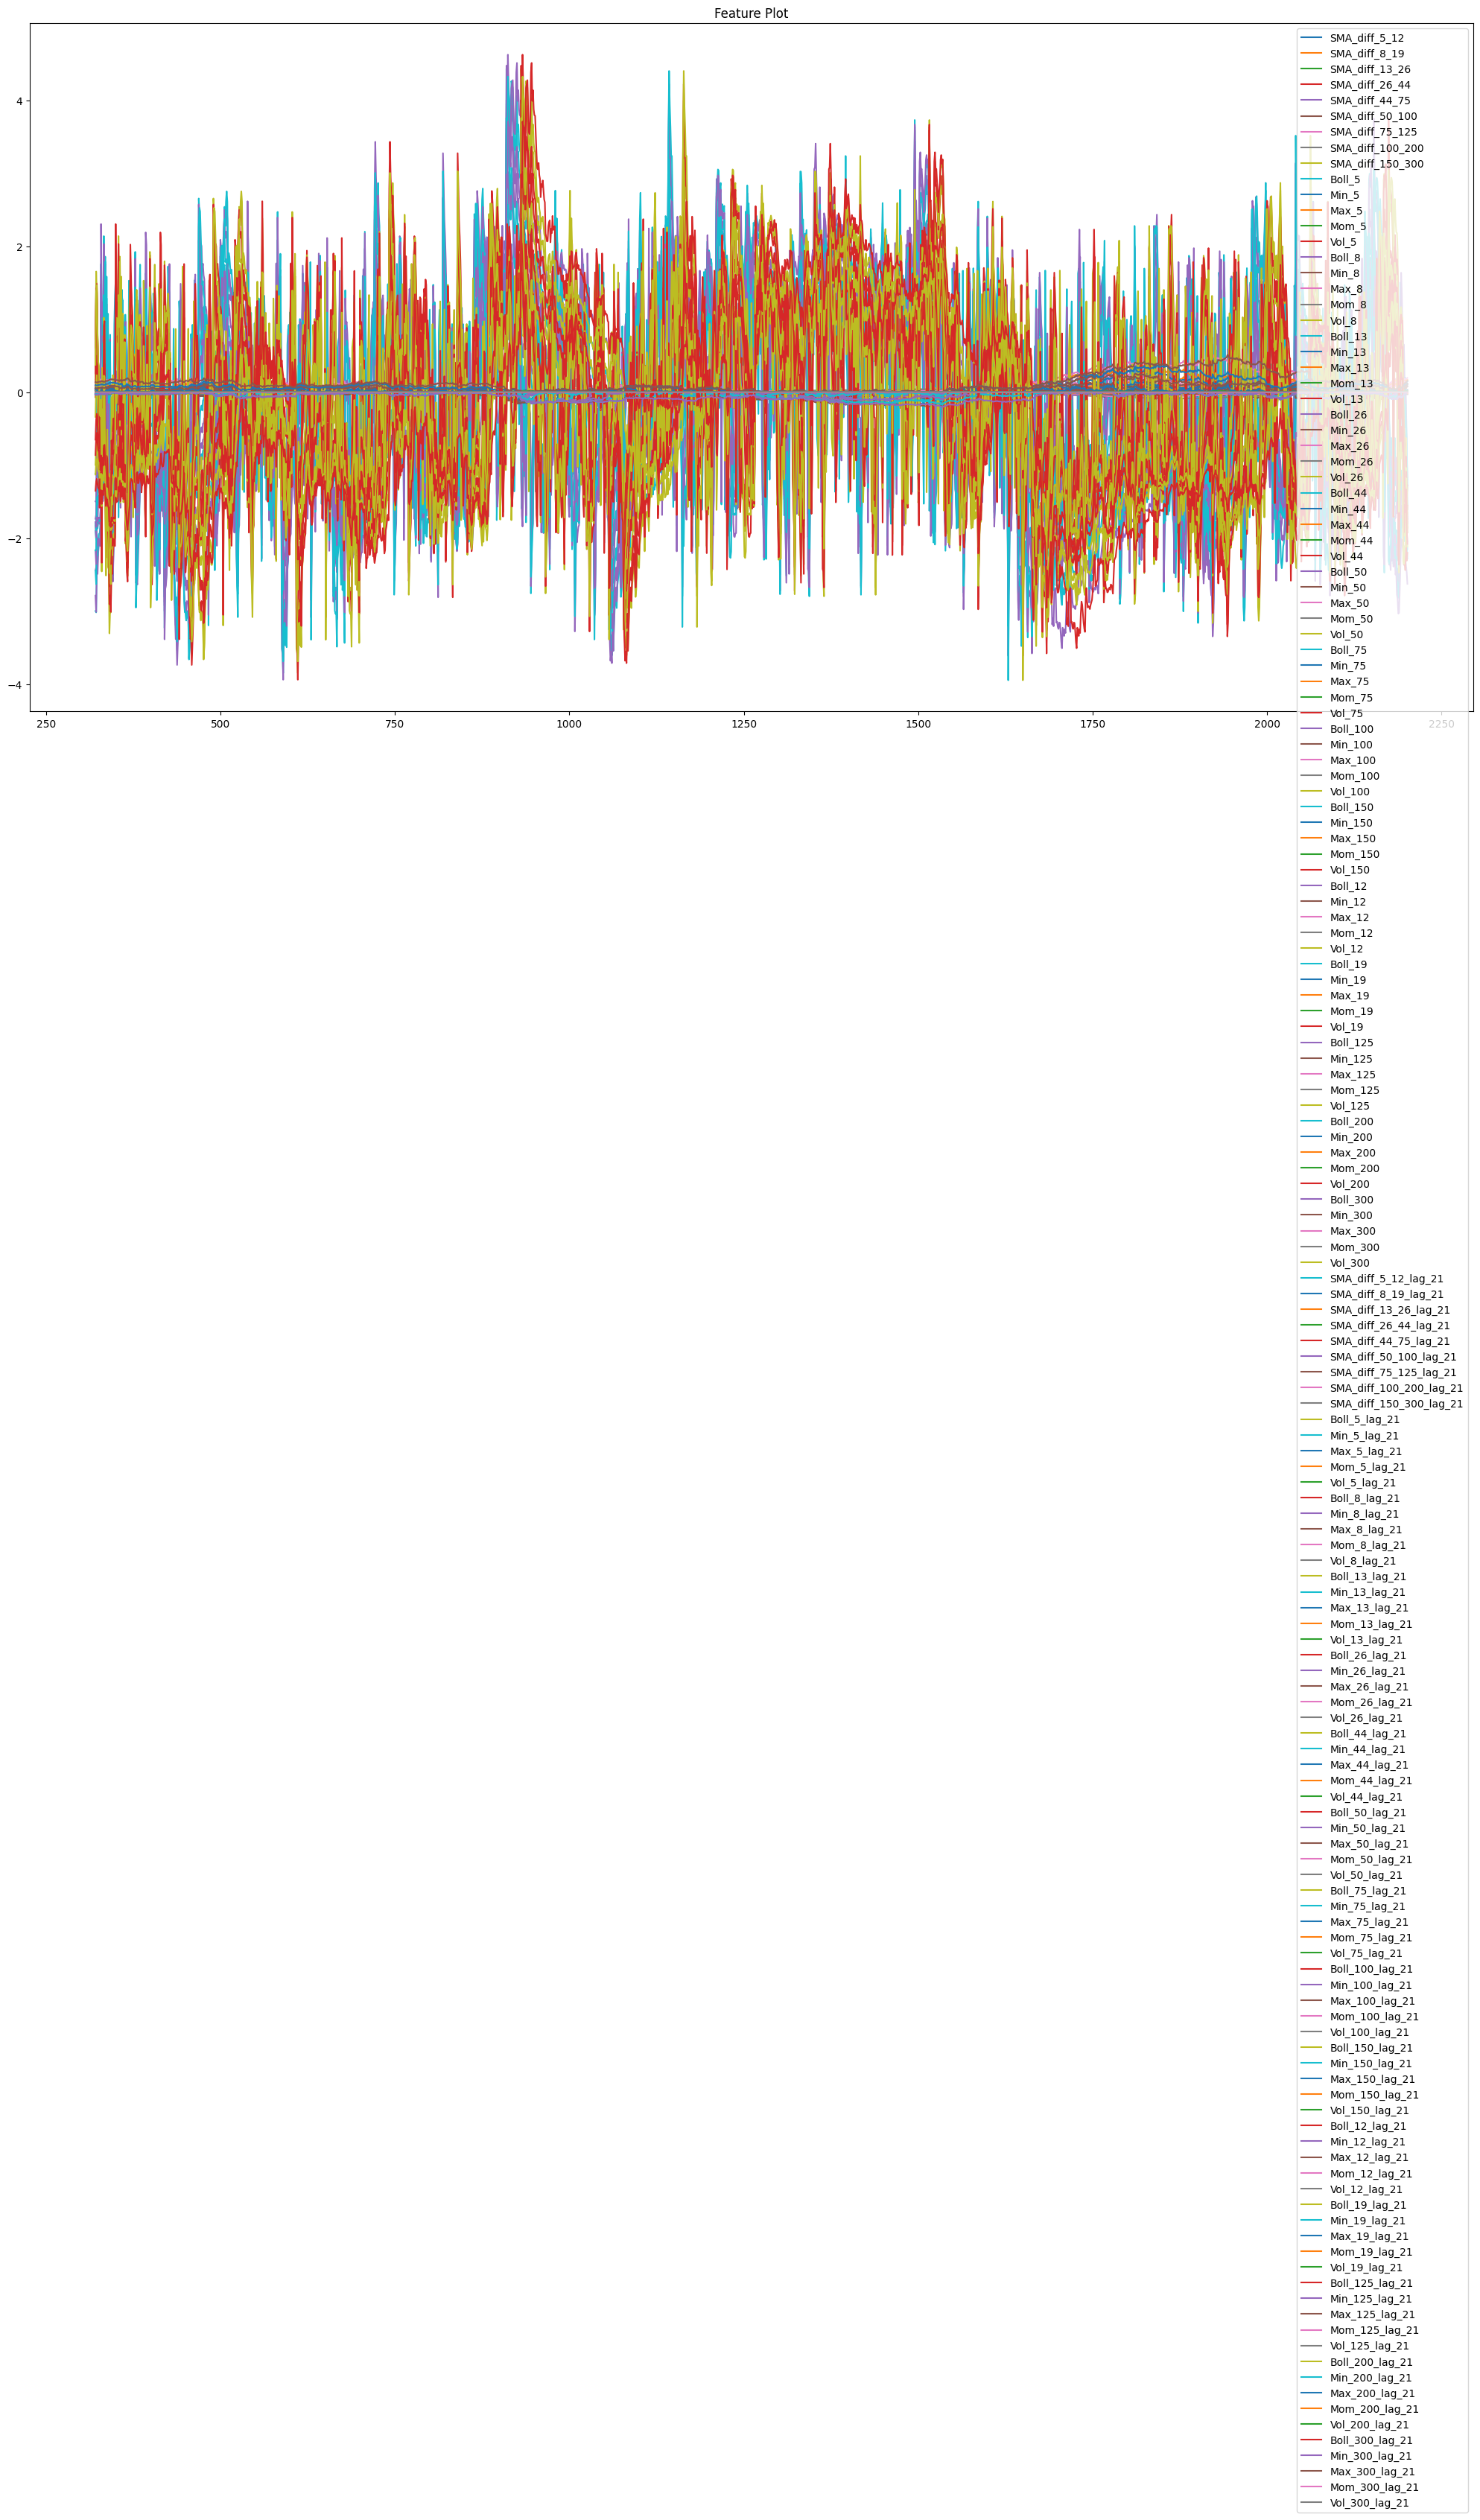

In [273]:
stock_df[stock_df.columns[8:]].plot(title='Feature Plot', figsize=(25, 12))

# Task 3 :Trading Predictive Models

In [274]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.823010,0.824681,0.822294,0.822532,0.217998,-0.001087,"(-0.00234, 0.00186]",no big change,-0.006685,-0.006672,...,-1.126887,-0.027946,0.100917,-0.000356,0.006952,-1.350584,-0.027946,0.142696,-0.000111,0.007073
322,0.828858,0.834109,0.814548,0.819430,0.299296,-0.003772,"(-0.0508, -0.00234]",decrease,-0.008050,-0.007826,...,-0.960661,-0.032793,0.095429,-0.000338,0.006961,-1.220679,-0.032793,0.136999,-0.000098,0.007079
323,0.818236,0.826113,0.818236,0.823726,0.092699,0.005243,"(0.00186, 0.0667]",increase,-0.008353,-0.007873,...,-0.913900,-0.033946,0.094123,-0.000321,0.006961,-1.184935,-0.033946,0.135643,-0.000109,0.007074
324,0.823607,0.824561,0.818355,0.821100,0.074473,-0.003187,"(-0.0508, -0.00234]",decrease,-0.008321,-0.008476,...,-1.010483,-0.030683,0.097818,-0.000316,0.006959,-1.261436,-0.030683,0.139479,-0.000116,0.007076
325,0.820683,0.823965,0.820504,0.822174,0.080293,0.001308,"(-0.00234, 0.00186]",no big change,-0.006672,-0.009112,...,-1.079976,-0.028221,0.100607,-0.000339,0.006958,-1.315289,-0.028221,0.142373,-0.000161,0.007050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.596849,0.597088,0.590047,0.590047,0.092391,-0.009814,"(-0.0508, -0.00234]",decrease,0.005330,0.000169,...,-1.024185,-0.023216,0.110371,-0.000102,0.009174,-1.174139,-0.023216,0.121598,-0.000233,0.009124
2198,0.590405,0.592195,0.587898,0.591956,0.089922,0.003236,"(0.00186, 0.0667]",increase,0.003361,0.002118,...,-1.355979,-0.011744,0.123412,-0.000168,0.009209,-1.503626,-0.011744,0.134771,-0.000262,0.009147
2199,0.592314,0.593508,0.588256,0.588972,0.139724,-0.005040,"(-0.0508, -0.00234]",decrease,0.001308,0.002639,...,-1.178302,-0.017326,0.117067,-0.000243,0.009101,-1.330110,-0.017326,0.128362,-0.000244,0.009153
2200,0.589450,0.589450,0.584795,0.586347,0.184605,-0.004458,"(-0.0508, -0.00234]",decrease,-0.001099,0.001558,...,-1.718074,0.000000,0.138957,-0.000388,0.009171,-1.872681,0.000000,0.150473,-0.000298,0.009217


In [275]:
stock_df.dropna(inplace=True) 

In [276]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_range,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.823010,0.824681,0.822294,0.822532,0.217998,-0.001087,"(-0.00234, 0.00186]",no big change,-0.006685,-0.006672,...,-1.126887,-0.027946,0.100917,-0.000356,0.006952,-1.350584,-0.027946,0.142696,-0.000111,0.007073
322,0.828858,0.834109,0.814548,0.819430,0.299296,-0.003772,"(-0.0508, -0.00234]",decrease,-0.008050,-0.007826,...,-0.960661,-0.032793,0.095429,-0.000338,0.006961,-1.220679,-0.032793,0.136999,-0.000098,0.007079
323,0.818236,0.826113,0.818236,0.823726,0.092699,0.005243,"(0.00186, 0.0667]",increase,-0.008353,-0.007873,...,-0.913900,-0.033946,0.094123,-0.000321,0.006961,-1.184935,-0.033946,0.135643,-0.000109,0.007074
324,0.823607,0.824561,0.818355,0.821100,0.074473,-0.003187,"(-0.0508, -0.00234]",decrease,-0.008321,-0.008476,...,-1.010483,-0.030683,0.097818,-0.000316,0.006959,-1.261436,-0.030683,0.139479,-0.000116,0.007076
325,0.820683,0.823965,0.820504,0.822174,0.080293,0.001308,"(-0.00234, 0.00186]",no big change,-0.006672,-0.009112,...,-1.079976,-0.028221,0.100607,-0.000339,0.006958,-1.315289,-0.028221,0.142373,-0.000161,0.007050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.596849,0.597088,0.590047,0.590047,0.092391,-0.009814,"(-0.0508, -0.00234]",decrease,0.005330,0.000169,...,-1.024185,-0.023216,0.110371,-0.000102,0.009174,-1.174139,-0.023216,0.121598,-0.000233,0.009124
2198,0.590405,0.592195,0.587898,0.591956,0.089922,0.003236,"(0.00186, 0.0667]",increase,0.003361,0.002118,...,-1.355979,-0.011744,0.123412,-0.000168,0.009209,-1.503626,-0.011744,0.134771,-0.000262,0.009147
2199,0.592314,0.593508,0.588256,0.588972,0.139724,-0.005040,"(-0.0508, -0.00234]",decrease,0.001308,0.002639,...,-1.178302,-0.017326,0.117067,-0.000243,0.009101,-1.330110,-0.017326,0.128362,-0.000244,0.009153
2200,0.589450,0.589450,0.584795,0.586347,0.184605,-0.004458,"(-0.0508, -0.00234]",decrease,-0.001099,0.001558,...,-1.718074,0.000000,0.138957,-0.000388,0.009171,-1.872681,0.000000,0.150473,-0.000298,0.009217


In [277]:
stock_df.Close_pct_change_category = stock_df.Close_pct_change_category.apply(lambda x:1 if(x== "increase")else 0)

In [278]:
stock_df.drop(columns="Close_pct_change_range",inplace = True)  # droping the  close_pct_change_Range colums as we dont need this need more to calcautet the big increase, decrease

In [279]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,Close_pct_change_category,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.823010,0.824681,0.822294,0.822532,0.217998,-0.001087,0,-0.006685,-0.006672,-0.005000,...,-1.126887,-0.027946,0.100917,-0.000356,0.006952,-1.350584,-0.027946,0.142696,-0.000111,0.007073
322,0.828858,0.834109,0.814548,0.819430,0.299296,-0.003772,0,-0.008050,-0.007826,-0.005542,...,-0.960661,-0.032793,0.095429,-0.000338,0.006961,-1.220679,-0.032793,0.136999,-0.000098,0.007079
323,0.818236,0.826113,0.818236,0.823726,0.092699,0.005243,1,-0.008353,-0.007873,-0.006111,...,-0.913900,-0.033946,0.094123,-0.000321,0.006961,-1.184935,-0.033946,0.135643,-0.000109,0.007074
324,0.823607,0.824561,0.818355,0.821100,0.074473,-0.003187,0,-0.008321,-0.008476,-0.006569,...,-1.010483,-0.030683,0.097818,-0.000316,0.006959,-1.261436,-0.030683,0.139479,-0.000116,0.007076
325,0.820683,0.823965,0.820504,0.822174,0.080293,0.001308,0,-0.006672,-0.009112,-0.007395,...,-1.079976,-0.028221,0.100607,-0.000339,0.006958,-1.315289,-0.028221,0.142373,-0.000161,0.007050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.596849,0.597088,0.590047,0.590047,0.092391,-0.009814,0,0.005330,0.000169,-0.014809,...,-1.024185,-0.023216,0.110371,-0.000102,0.009174,-1.174139,-0.023216,0.121598,-0.000233,0.009124
2198,0.590405,0.592195,0.587898,0.591956,0.089922,0.003236,1,0.003361,0.002118,-0.012559,...,-1.355979,-0.011744,0.123412,-0.000168,0.009209,-1.503626,-0.011744,0.134771,-0.000262,0.009147
2199,0.592314,0.593508,0.588256,0.588972,0.139724,-0.005040,0,0.001308,0.002639,-0.009787,...,-1.178302,-0.017326,0.117067,-0.000243,0.009101,-1.330110,-0.017326,0.128362,-0.000244,0.009153
2200,0.589450,0.589450,0.584795,0.586347,0.184605,-0.004458,0,-0.001099,0.001558,-0.007671,...,-1.718074,0.000000,0.138957,-0.000388,0.009171,-1.872681,0.000000,0.150473,-0.000298,0.009217


In [280]:
Y = stock_df.Close_pct_change_category.to_frame() # Y is labes for big change or small changes

In [281]:
stock_df.drop(columns="Close_pct_change_category",inplace = True)


In [282]:
stock_df

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
321,0.823010,0.824681,0.822294,0.822532,0.217998,-0.001087,-0.006685,-0.006672,-0.005000,-0.001259,...,-1.126887,-0.027946,0.100917,-0.000356,0.006952,-1.350584,-0.027946,0.142696,-0.000111,0.007073
322,0.828858,0.834109,0.814548,0.819430,0.299296,-0.003772,-0.008050,-0.007826,-0.005542,-0.001397,...,-0.960661,-0.032793,0.095429,-0.000338,0.006961,-1.220679,-0.032793,0.136999,-0.000098,0.007079
323,0.818236,0.826113,0.818236,0.823726,0.092699,0.005243,-0.008353,-0.007873,-0.006111,-0.001898,...,-0.913900,-0.033946,0.094123,-0.000321,0.006961,-1.184935,-0.033946,0.135643,-0.000109,0.007074
324,0.823607,0.824561,0.818355,0.821100,0.074473,-0.003187,-0.008321,-0.008476,-0.006569,-0.002422,...,-1.010483,-0.030683,0.097818,-0.000316,0.006959,-1.261436,-0.030683,0.139479,-0.000116,0.007076
325,0.820683,0.823965,0.820504,0.822174,0.080293,0.001308,-0.006672,-0.009112,-0.007395,-0.002766,...,-1.079976,-0.028221,0.100607,-0.000339,0.006958,-1.315289,-0.028221,0.142373,-0.000161,0.007050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.596849,0.597088,0.590047,0.590047,0.092391,-0.009814,0.005330,0.000169,-0.014809,-0.024426,...,-1.024185,-0.023216,0.110371,-0.000102,0.009174,-1.174139,-0.023216,0.121598,-0.000233,0.009124
2198,0.590405,0.592195,0.587898,0.591956,0.089922,0.003236,0.003361,0.002118,-0.012559,-0.025305,...,-1.355979,-0.011744,0.123412,-0.000168,0.009209,-1.503626,-0.011744,0.134771,-0.000262,0.009147
2199,0.592314,0.593508,0.588256,0.588972,0.139724,-0.005040,0.001308,0.002639,-0.009787,-0.026243,...,-1.178302,-0.017326,0.117067,-0.000243,0.009101,-1.330110,-0.017326,0.128362,-0.000244,0.009153
2200,0.589450,0.589450,0.584795,0.586347,0.184605,-0.004458,-0.001099,0.001558,-0.007671,-0.026372,...,-1.718074,0.000000,0.138957,-0.000388,0.009171,-1.872681,0.000000,0.150473,-0.000298,0.009217


In [283]:
X= stock_df.copy() # X = are features  from all the indicator  

In [284]:
X.describe()

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
count,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,...,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000,1881.000000
mean,0.785594,0.789055,0.782252,0.785496,0.149301,-0.000161,-0.000454,-0.000726,-0.000865,-0.001060,...,-0.346802,-0.051585,0.089938,-0.000138,0.006602,-0.346241,-0.062800,0.126983,-0.000145,0.006576
std,0.090729,0.090814,0.090702,0.090822,0.148145,0.006904,0.005890,0.007428,0.007578,0.007900,...,1.430641,0.044197,0.082780,0.000527,0.001103,1.499445,0.052482,0.117190,0.000463,0.000982
min,0.575964,0.581096,0.573338,0.578112,0.000000,-0.049761,-0.020103,-0.025148,-0.027566,-0.026372,...,-3.661968,-0.171695,0.000000,-0.001505,0.005156,-3.507553,-0.202227,0.000000,-0.001307,0.005506
25%,0.729681,0.732904,0.726428,0.729323,0.073098,-0.003590,-0.004139,-0.005426,-0.005481,-0.005983,...,-1.454461,-0.079909,0.034624,-0.000381,0.005843,-1.444002,-0.100602,0.042436,-0.000389,0.005849
50%,0.788042,0.791503,0.785058,0.787922,0.108933,-0.000149,-0.000699,-0.000859,-0.001147,-0.001135,...,-0.636548,-0.037938,0.069164,-0.000178,0.006146,-0.711243,-0.049426,0.093480,-0.000192,0.006177
75%,0.832200,0.835064,0.829455,0.832558,0.171785,0.003231,0.002913,0.003545,0.003612,0.003368,...,0.741345,-0.015990,0.108752,0.000276,0.006959,0.821560,-0.017344,0.154123,0.000256,0.006914
max,0.996300,1.000000,0.991646,0.996778,2.000000,0.066679,0.027799,0.030308,0.030198,0.029353,...,4.327417,0.000000,0.368710,0.000934,0.009475,4.514896,0.000000,0.511195,0.000689,0.009217


In [285]:
X.shape # this will say you how many features we have 

(1881, 164)

In [286]:
Y.shape   # Y is all  big increase , incease and no increase


(1881, 1)

In [287]:

# Get the percentage to split the data( 70% data for training set, and 30% data for test set)

percentage_split =0.7;
row= int(stock_df.shape[0]*percentage_split)

#create the train data set
X_train = X[:row]

Y_train = Y[:row]

#create the test data set 
X_test = X[row:]
Y_test = Y[row:]



### **Testing code to check the X and Y**

Testing code for X and Y -- End

**First Data Model Predication -SVC(scalar vector classification) - MODEL-1**

In [288]:
# #Hyperparameter tuning for SVM
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.model_selection import ParameterSampler, train_test_split

In [289]:
# param_grid = {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'rbf'], 'gamma': np.logspace(-3, 3, 7)}

# # Generate 100 different parameter combinations
# param_sampler = ParameterSampler(param_grid, n_iter=100, random_state=42)
# param_combos = list(param_sampler)

# # Loop through the parameter combinations and train SVM models
# for i, params in enumerate(param_combos):
#     svm = SVC(**params)
#     svm.fit(X_train, Y_train)
#     accuracy = svm.score(X_test, Y_test)
#     print("Parameter Combo", i + 1)
#     print("Parameters:", params)
#     print("Test Set Accuracy:", accuracy)
#     print("------------")

# #77% : 'kernel': 'linear', 'gamma': 1000.0, 'C': 1000.0

In [290]:
# imported the libary for the machine learning model which is  support Vector Classifier (SVC)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

params = {'C': [500, 1000, 2000,1000], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': [500, 1000, 2000,1000]}

# Now creating model
model = SVC()
grid_search = GridSearchCV(model, params, cv=5)

model.fit(X_train,Y_train)  #training the model on X_train and Y_Train


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [291]:
#X_train.describe().iloc[1,:].plot()

In [292]:
model.score(X_train,Y_train) # checking the score the model on train data set

0.8168693009118541

In [293]:
model.score(X_test,Y_test)# checking the score the model on test data set

0.8053097345132744

In [294]:
#stock_df['Prediction_SVC']

In [295]:
X_test

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
1637,0.947965,0.954768,0.947965,0.952004,0.097831,0.002745,0.003735,-0.001865,-0.003789,-0.001089,...,0.596282,-0.053061,0.047667,0.000239,0.005730,0.868542,-0.113648,0.047667,0.000418,0.005658
1638,0.953753,0.953753,0.943669,0.945220,0.092276,-0.007126,0.006516,0.000390,-0.003592,-0.001247,...,0.374267,-0.049125,0.052022,0.000216,0.005738,0.741108,-0.109963,0.052022,0.000394,0.005662
1639,0.943907,0.946175,0.941341,0.943191,0.108333,-0.002146,0.008927,0.001899,-0.003670,-0.001417,...,0.451267,-0.048415,0.050302,0.000276,0.005690,0.786272,-0.111418,0.050302,0.000383,0.005656
1640,0.944623,0.945996,0.942953,0.944564,0.080417,0.001455,0.007251,0.002715,-0.003625,-0.001847,...,0.469851,-0.048894,0.049774,0.000254,0.005680,0.797376,-0.111865,0.049774,0.000373,0.005653
1641,0.942953,0.944504,0.939730,0.942833,0.261565,-0.001832,0.004417,0.004037,-0.002987,-0.002251,...,0.181205,-0.043846,0.055345,0.000203,0.005684,0.631421,-0.107152,0.055345,0.000350,0.005662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.596849,0.597088,0.590047,0.590047,0.092391,-0.009814,0.005330,0.000169,-0.014809,-0.024426,...,-1.024185,-0.023216,0.110371,-0.000102,0.009174,-1.174139,-0.023216,0.121598,-0.000233,0.009124
2198,0.590405,0.592195,0.587898,0.591956,0.089922,0.003236,0.003361,0.002118,-0.012559,-0.025305,...,-1.355979,-0.011744,0.123412,-0.000168,0.009209,-1.503626,-0.011744,0.134771,-0.000262,0.009147
2199,0.592314,0.593508,0.588256,0.588972,0.139724,-0.005040,0.001308,0.002639,-0.009787,-0.026243,...,-1.178302,-0.017326,0.117067,-0.000243,0.009101,-1.330110,-0.017326,0.128362,-0.000244,0.009153
2200,0.589450,0.589450,0.584795,0.586347,0.184605,-0.004458,-0.001099,0.001558,-0.007671,-0.026372,...,-1.718074,0.000000,0.138957,-0.000388,0.009171,-1.872681,0.000000,0.150473,-0.000298,0.009217


In [296]:
#Now we make and show the models predictins

#showing the prediction
def predictDF(df, model, name):
  data = pd.DataFrame()
  data[name] = model.predict(df)
  return data
  


In [297]:
svc_pred = predictDF(X_test, model, "Prediction_SVC")

In [298]:
svc_pred

,Prediction_SVC
0,1
1,0
2,0
3,0
4,0
...,...
560,0
561,0
562,0
563,0


In [299]:
X_test

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
1637,0.947965,0.954768,0.947965,0.952004,0.097831,0.002745,0.003735,-0.001865,-0.003789,-0.001089,...,0.596282,-0.053061,0.047667,0.000239,0.005730,0.868542,-0.113648,0.047667,0.000418,0.005658
1638,0.953753,0.953753,0.943669,0.945220,0.092276,-0.007126,0.006516,0.000390,-0.003592,-0.001247,...,0.374267,-0.049125,0.052022,0.000216,0.005738,0.741108,-0.109963,0.052022,0.000394,0.005662
1639,0.943907,0.946175,0.941341,0.943191,0.108333,-0.002146,0.008927,0.001899,-0.003670,-0.001417,...,0.451267,-0.048415,0.050302,0.000276,0.005690,0.786272,-0.111418,0.050302,0.000383,0.005656
1640,0.944623,0.945996,0.942953,0.944564,0.080417,0.001455,0.007251,0.002715,-0.003625,-0.001847,...,0.469851,-0.048894,0.049774,0.000254,0.005680,0.797376,-0.111865,0.049774,0.000373,0.005653
1641,0.942953,0.944504,0.939730,0.942833,0.261565,-0.001832,0.004417,0.004037,-0.002987,-0.002251,...,0.181205,-0.043846,0.055345,0.000203,0.005684,0.631421,-0.107152,0.055345,0.000350,0.005662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0.596849,0.597088,0.590047,0.590047,0.092391,-0.009814,0.005330,0.000169,-0.014809,-0.024426,...,-1.024185,-0.023216,0.110371,-0.000102,0.009174,-1.174139,-0.023216,0.121598,-0.000233,0.009124
2198,0.590405,0.592195,0.587898,0.591956,0.089922,0.003236,0.003361,0.002118,-0.012559,-0.025305,...,-1.355979,-0.011744,0.123412,-0.000168,0.009209,-1.503626,-0.011744,0.134771,-0.000262,0.009147
2199,0.592314,0.593508,0.588256,0.588972,0.139724,-0.005040,0.001308,0.002639,-0.009787,-0.026243,...,-1.178302,-0.017326,0.117067,-0.000243,0.009101,-1.330110,-0.017326,0.128362,-0.000244,0.009153
2200,0.589450,0.589450,0.584795,0.586347,0.184605,-0.004458,-0.001099,0.001558,-0.007671,-0.026372,...,-1.718074,0.000000,0.138957,-0.000388,0.009171,-1.872681,0.000000,0.150473,-0.000298,0.009217


In [300]:
def graphReturns(df, data, name):
  from pandas.io.formats.style import plt
  from ast import Return
  stock_df = df.copy()
  dat = data.copy()
  stock_df = pd.concat([stock_df,dat],axis=1,ignore_index=True,sort=False)
  print(stock_df)
  stock_df['Return'] =stock_df['Close'].pct_change(1)
  stock_df['Strat_Return'] = stock_df[name].shift(1)*stock_df['Return']
  stock_df['Strat_Return']  # this will shows the stratergy returns from SVC

  # calculate the cumlative returns
  stock_df['Cummulative_Return'] = stock_df['Return'].cumsum()
  # strategy cummlative return
  stock_df['Cummulative_Strat'] = stock_df['Strat_Return'].cumsum()
  stock_df['Cummulative_Strat']

  # Grpah to check our first stratergy
  plt.figure(figsize=(16,8))
  plt.title('Returns')
  plt.plot(stock_df['Cummulative_Return'],color = 'orange',label = 'Stock return')
  plt.plot(stock_df['Cummulative_Strat'],color = 'Red',label = 'Stratergy return')
  plt.xticks(rotation =45)
  plt.legend()
  plt.show()


In [301]:
#graphReturns(X_test, svc_pred,"Prediction_SVC")

**Second Data Model Predication -(Random Forest_Regression )  MODEL-2**

In [302]:
#creating a second model 
from sklearn.ensemble import RandomForestClassifier
model_RFR = RandomForestClassifier()
model_RFR.fit(X_train,Y_train)





<ipython-input-302-d9aa80432684>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train,Y_train)


RandomForestClassifier()

In [303]:
model_RFR.score(X_train,Y_train) # Random

1.0

In [304]:
model_RFR.score(X_test,Y_test)

0.9911504424778761

In [305]:
#Now we make and show the models predictins
#stock_df['Prediction_RFR'] = model.predict(X)
rfr_pred = predictDF(X_test, model_RFR, "Prediction_RFR")

In [306]:
rfr_pred.sum()

Prediction_RFR    182
dtype: int64

In [307]:
#sum(stock_df['Prediction_RFR'])

### **Third Model -- Logistic Regression MODEL- 3**


In [308]:
#creating a second model 
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [309]:
model_LR.score(X_train,Y_train) # logisticRegresssion  on train data


0.8130699088145896

In [310]:
model_LR.score(X_test,Y_test) # logistic Regression on test data

0.8212389380530973

In [311]:
lr_pred = predictDF(X_test, model_LR, "Prediction_LR")

In [312]:
sum(lr_pred['Prediction_LR'])

154

### **Forth model for predcition which is DescionTreeRegressor MODEL-4**

In [313]:
#creating the froth model for prediction
from sklearn.tree import DecisionTreeClassifier
model_DTR = DecisionTreeClassifier()
model_DTR.fit(X_train,Y_train)



DecisionTreeClassifier()

In [314]:
model_DTR.score(X_train,Y_train) # logisticRegresssion  on train data

1.0

In [315]:
model_DTR.score(X_test,Y_test) # logisticRegresssion  on train data

0.9982300884955753

In [316]:
dtr_pred = predictDF(X_test, model_DTR, "Prediction_DTR")

In [317]:
sum(dtr_pred['Prediction_DTR'])

184

### **fith model for Prediction which is DNN MODEL-5**

In [318]:
from pandas.core.algorithms import mode
#creating the fifth model for prediction

from sklearn.neural_network import MLPClassifier
model_DNN = MLPClassifier()
model_DNN= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

model_DNN.fit(X_train,Y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [319]:
model_DNN.score(X_train,Y_train)#DNN ON Train data


0.8411854103343465

In [320]:
model_DNN.score(X_test,Y_test) # DNN on the test data

0.8017699115044248

In [321]:
dnn_pred = predictDF(X_test, model_DNN, "Prediction_DNN")
sum(dnn_pred['Prediction_DNN'])

165

### **SIX model for predicition  K-NNN  MODEL-6**


In [322]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [323]:
knn.score(X_train,Y_train)

0.7948328267477204

In [324]:
knn.score(X_test,Y_test)

0.7415929203539823

In [325]:
knn_pred = predictDF(X_test, knn, "Prediction_KNN")
sum(knn_pred['Prediction_KNN'])

103

### **Seventh Modelf ro predicition GaussianNB MODEL-7**


In [326]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

# Generate sample data for demonstration purposes
# Create a Gaussian Naive Bayes classifier object
classifier = GaussianNB()

# Fit the classifier to the sample data
classifier.fit(X_train, Y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [327]:
classifier.score(X_train,Y_train)

0.7013677811550152

In [328]:
classifier.score(X_test,Y_test)

0.7185840707964601

In [329]:
class_pred = predictDF(X_test, classifier, "Prediction_Classifier")
sum(class_pred['Prediction_Classifier'])

94

### **Eight Model for predicition XGBOOST MODEL-8**

In [330]:
import numpy as np
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Generate sample data for demonstration purposes
# Split the data into training and test sets


# Create an XGBoost classifier object
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, Y_train)

# Fit the classifier to the train

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [331]:
classifier_XGB.score(X_train,Y_train)

1.0

In [332]:
classifier_XGB.score(X_test,Y_test)

0.9982300884955753

In [333]:
XGB_pred = predictDF(X_test, classifier_XGB, "Prediction_XGB")
sum(XGB_pred['Prediction_XGB'])

184

### **Nineth Model fro predicition ADABoostClassifier -9**

In [334]:
from sklearn.ensemble import AdaBoostClassifier
clf_ADA = AdaBoostClassifier(n_estimators=100, random_state=0) 
clf_ADA.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [335]:
clf_ADA.score(X_train,Y_train)

1.0

In [336]:
clf_ADA.score(X_test,Y_test)

0.9982300884955753

In [337]:
ADA_pred = predictDF(X_test, clf_ADA, "Prediction_ADA")
sum(ADA_pred['Prediction_ADA'])

184

### **Tenth Model for predicition  MODEL-10**

In [338]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Train the Gradient Boosting model
model_GD = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model_GD.fit(X_train, Y_train)

# Evaluate the model on the test set



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=1, random_state=0)

In [339]:
model_GD.score(X_train,Y_train)

1.0

In [340]:
model_GD.score(X_test,Y_test)

0.9982300884955753

In [341]:
GD_pred = predictDF(X_test, model_GD, "Prediction_GD")
sum(GD_pred['Prediction_GD'])

184

### **From here we are finding the  classification and recall prscsion (3.2 and 3.3) each  10 model for the task 3**

### **Recall and Prescsion from confusing matrxi -- for Model GD Model -10**

In [342]:
from sklearn.metrics import confusion_matrix
Label1_For_GD = confusion_matrix(Y_test, model_GD.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _GD.predict
TP_GD = Label1_For_GD[0,0]
FP_GD = Label1_For_GD[0,1]
TN_GD = Label1_For_GD[1,1]
FN_GD = Label1_For_GD[1,0]
precision_GD = TP_GD/(TP_GD+FP_GD)
RECALL_GD = TP_GD/(TP_GD+FN_GD)

print("Precision for GD_model: ",precision_GD)
print("Recall for GD_model : ", RECALL_GD)
print("Confusion Matrix: \n", Label1_For_GD)



Precision for GD_model:  0.9973821989528796
Recall for GD_model :  1.0
Confusion Matrix: 
 [[381   1]
 [  0 183]]


In [343]:
#X_test

In [344]:
#X_train

### **Recall and Prescsion from confusing matrxi -- for Model ADA - Model -9**

In [345]:
Label1_For_ADA = confusion_matrix(Y_test, clf_ADA.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_ADA = Label1_For_ADA[0,0]
FP_ADA = Label1_For_ADA[0,1]
TN_ADA = Label1_For_ADA[1,1]
FN_ADA = Label1_For_ADA[1,0]
precision_ADA = TP_ADA/(TP_ADA+FP_ADA)
RECALL_ADA = TP_ADA/(TP_ADA+FN_ADA)

print("Precision for ADD_model: ",precision_ADA)
print("Recall for ADA_model : ", RECALL_ADA)
print("Confusion Matrix: \n", Label1_For_ADA)

Precision for ADD_model:  0.9973821989528796
Recall for ADA_model :  1.0
Confusion Matrix: 
 [[381   1]
 [  0 183]]


### **Recall and Prescsion from confusing matrxi -- for Model XGB - Model 8**

In [346]:
Label1_For_XGB = confusion_matrix(Y_test, classifier_XGB.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_XGB = Label1_For_XGB[0,0]
FP_XGB = Label1_For_XGB[0,1]
TN_XGB = Label1_For_XGB[1,1]
FN_XGB = Label1_For_XGB[1,0]
precision_XGB = TP_XGB/(TP_XGB+FP_XGB)
RECALL_XGB = TP_XGB/(TP_XGB+FN_XGB)

print("Precision for XGB_model: ",precision_XGB)
print("Recall for XGB_model : ", RECALL_XGB)
print("Confusion Matrix: \n", Label1_For_XGB)

Precision for XGB_model:  0.9973821989528796
Recall for XGB_model :  1.0
Confusion Matrix: 
 [[381   1]
 [  0 183]]


### **Recall and Prescsion from confusing matriX -- for Model GaussianNB- Model 7**

In [347]:
Label1_For_GNB = confusion_matrix(Y_test, classifier.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_GNB = Label1_For_GNB[0,0]
FP_GNB = Label1_For_GNB[0,1]
TN_GNB = Label1_For_GNB[1,1]
FN_GNB = Label1_For_GNB[1,0]
precision_GNB = TP_GNB/(TP_GNB+FP_GNB)
RECALL_GNB = TP_GNB/(TP_GNB+FN_GNB)

print("Precision for GNB_model: ",precision_GNB)
print("Recall for GNB_model : ", RECALL_GNB)
print("Confusion Matrix: \n", Label1_For_GNB)

Precision for GNB_model:  0.9083769633507853
Recall for GNB_model :  0.7367303609341825
Confusion Matrix: 
 [[347  35]
 [124  59]]


### **Recall and Prescsion from confusing matriX -- for Model KNN- Model 6**

In [348]:
Label1_For_KNN = confusion_matrix(Y_test, knn.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_KNN = Label1_For_KNN[0,0]
FP_KNN = Label1_For_KNN[0,1]
TN_KNN = Label1_For_KNN[1,1]
FN_KNN = Label1_For_KNN[1,0]
precision_KNN = TP_KNN/(TP_KNN+FP_KNN)
RECALL_KNN = TP_KNN/(TP_KNN+FN_KNN)

print("Precision for KNN_model: ",precision_KNN)
print("Recall for KNN_model : ", RECALL_KNN)
print("Confusion Matrix: \n", Label1_For_KNN)

Precision for KNN_model:  0.9136125654450262
Recall for KNN_model :  0.7554112554112554
Confusion Matrix: 
 [[349  33]
 [113  70]]


### **Recall and Prescsion from confusing matriX -- for Model DNN- Model 5**

In [349]:
Label1_For_DNN = confusion_matrix(Y_test, model_DNN.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_DNN = Label1_For_DNN[0,0]
FP_DNN = Label1_For_DNN[0,1]
TN_DNN = Label1_For_DNN[1,1]
FN_DNN = Label1_For_DNN[1,0]
precision_DNN = TP_DNN/(TP_DNN+FP_DNN)
RECALL_DNN = TP_DNN/(TP_DNN+FN_DNN)

print("Precision for DNN_model: ",precision_DNN)
print("Recall for DNN_model : ", RECALL_DNN)
print("Confusion Matrix: \n", Label1_For_DNN)

Precision for DNN_model:  0.8769633507853403
Recall for DNN_model :  0.8375
Confusion Matrix: 
 [[335  47]
 [ 65 118]]


In [350]:
X.shape

(1881, 164)

### **Recall and Prescsion from confusing matriX -- for Model DTR- Model 4**

In [351]:
Label1_For_DTR = confusion_matrix(Y_test, model_DTR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_DTR = Label1_For_DTR[0,0]
FP_DTR = Label1_For_DTR[0,1]
TN_DTR = Label1_For_DTR[1,1]
FN_DTR = Label1_For_DTR[1,0]
precision_DTR = TP_DTR/(TP_DTR+FP_DTR)
RECALL_DTR= TP_DTR/(TP_DTR+FN_DTR)

print("Precision for DTR_model: ",precision_DTR)
print("Recall for DTR_model : ", RECALL_DTR)
print("Confusion Matrix: \n", Label1_For_DTR)

Precision for DTR_model:  0.9973821989528796
Recall for DTR_model :  1.0
Confusion Matrix: 
 [[381   1]
 [  0 183]]


### **Recall and Prescsion from confusing matriX -- for Model LR- Model 3**

In [352]:
Label1_For_LR = confusion_matrix(Y_test, model_LR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_LR = Label1_For_LR[0,0]
FP_LR = Label1_For_LR[0,1]
TN_LR = Label1_For_LR[1,1]
FN_LR = Label1_For_LR[1,0]
precision_LR = TP_LR/(TP_LR+FP_LR)
RECALL_LR= TP_LR/(TP_LR+FN_LR)

print("Precision for LR_model: ",precision_LR)
print("Recall for LR_model : ", RECALL_LR)
print("Confusion Matrix: \n", Label1_For_LR)

Precision for LR_model:  0.9057591623036649
Recall for LR_model :  0.8418491484184915
Confusion Matrix: 
 [[346  36]
 [ 65 118]]


### **Recall and Prescsion from confusing matriX -- for Model RFR- Model 2**

In [353]:
Label1_For_RFR = confusion_matrix(Y_test, model_RFR.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_RFR = Label1_For_RFR[0,0]
FP_RFR = Label1_For_RFR[0,1]
TN_RFR = Label1_For_RFR[1,1]
FN_RFR = Label1_For_RFR[1,0]
precision_RFR = TP_RFR/(TP_RFR+FP_RFR)
RECALL_RFR= TP_RFR/(TP_RFR+FN_RFR)

print("Precision for RFR_model: ",precision_RFR)
print("Recall for RFR_model : ", RECALL_RFR)
print("Confusion Matrix: \n", Label1_For_RFR)

Precision for RFR_model:  0.9947643979057592
Recall for RFR_model :  0.9921671018276762
Confusion Matrix: 
 [[380   2]
 [  3 180]]


### **Recall and Prescsion from confusing matriX -- for Model SVC- Model 1**

In [354]:
Label1_For_SVC = confusion_matrix(Y_test, model.predict(X_test))   ## Confusion matrix  for classfication precision  for Model _LR

TP_SVC = Label1_For_SVC[0,0]
FP_SVC = Label1_For_SVC[0,1]
TN_SVC = Label1_For_SVC[1,1]
FN_SVC = Label1_For_SVC[1,0]
precision_SVC = TP_SVC/(TP_SVC+FP_SVC)
RECALL_SVC= TP_SVC/(TP_SVC+FN_SVC)

print("Precision for SVC_model: ",precision_SVC)
print("Recall for SVC_model : ", RECALL_SVC)
print("Confusion Matrix: \n", Label1_For_SVC)

Precision for SVC_model:  0.9450261780104712
Recall for SVC_model :  0.8022222222222222
Confusion Matrix: 
 [[361  21]
 [ 89  94]]


### **Task 4 and 5**

### **Task <4  and 5 > ---- start from here, With Using PCA(Principal Component Analysis) and repeating task 3 again for all the 10 model and spilt**

In [355]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

"""scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled"""

'scaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\nX_scaled'

In [356]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98) ## We used 0.95 to restore 95 % of intformation


X_pca = pca.fit_transform(X)
#shape ## This gave us that out of 95 features 3 features are that which will be important for us to selection  from X 

In [357]:
components = pca.components_


In [358]:
components.shape

(9, 164)

Again Spliting the  data set  with THE PCA(Principal Component Analysis)

In [359]:
# Get the percentage to split the data( 80% data for training set, and 10% data for test set)

percentage_split =0.8;
row= int(X_pca.shape[0]*percentage_split)

#create the train data set
X_train_pca = X_pca[:row]

Y_train_pca = Y[:row]

#create the test data set 
X_test_pca = X_pca[row:]
Y_test_pca = Y[row:]

Now using the above Split _pca data set to  train all the model again in the dats set and see which one is best

### **Model set for GD  for n = 91 with PCA_Spilt - for model 10**

In [360]:
from sklearn.metrics import precision_score
model_GD = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)  # MODEL fit !!!!!!! for model_GD
model_GD.fit(X_train_pca, Y_train_pca)

  
confusion_matrix(Y_test_pca, model_GD.predict(X_test_pca))   ## Confusion matrix  for classfication precision  for Model _GD.predict
GD = confusion_matrix(Y_test_pca, model_GD.predict(X_test_pca))


print("score: " +str(model_GD.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_GD.predict(X_test_pca))))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score: 0.7427055702917772
precision: 0.7272727272727273


In [361]:
print(GD)

[[224  21]
 [ 76  56]]


### **Model set for CLF_ADA(AdaaBoost) for n = 91 with PCA_Spilt - for model 9**

In [362]:
clf_ADA = AdaBoostClassifier(n_estimators=100, random_state=0) 
clf_ADA.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, clf_ADA.predict(X_test_pca))
ada = confusion_matrix(Y_test_pca, clf_ADA.predict(X_test_pca))
clf_ADA.score(X_train_pca,Y_train_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.831781914893617

In [363]:
print("score: " +str(clf_ADA.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, clf_ADA.predict(X_test_pca))))

score: 0.7824933687002652
precision: 0.7717391304347826


### **Model set for XGB_BOOST for n =  with PCA_Spilt- for model 8**

In [364]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, classifier_XGB.predict(X_test_pca))
xgb =confusion_matrix(Y_test_pca, classifier_XGB.predict(X_test_pca))
classifier_XGB.score(X_train_pca,Y_train_pca)



1.0

In [365]:
print("score: " +str(classifier_XGB.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, classifier_XGB.predict(X_test_pca))))

score: 0.7692307692307693
precision: 0.7227722772277227


### **Model set for GaussianNB for n = 66 with PCA_Spilt- for model 7**

In [366]:
classifier = GaussianNB()

# Fit the classifier to the sample data
classifier.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, classifier.predict(X_test_pca))
gnb = confusion_matrix(Y_test_pca, classifier.predict(X_test_pca))
classifier.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.800531914893617

In [367]:
print("score: " +str(classifier.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, classifier.predict(X_test_pca))))

score: 0.8063660477453581
precision: 0.8041237113402062


### **Model set for KNN for n = 66 with PCA_Spilt- for model 6**

In [368]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca, Y_train_pca)
confusion_matrix(Y_test_pca, knn.predict(X_test_pca))
knn_Value = confusion_matrix(Y_test_pca, knn.predict(X_test_pca))
knn.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7978723404255319

In [369]:
print("score: " +str(knn.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, knn.predict(X_test_pca))))

score: 0.7347480106100795
precision: 0.686046511627907


### **Model set for DNN for n = 66 with PCA_Spilt- for model 5**

In [370]:
model_DNN = MLPClassifier()
model_DNN= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model_DNN.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_DNN.predict(X_test_pca))
dnn = confusion_matrix(Y_test_pca, model_DNN.predict(X_test_pca))
model_DNN.score(X_train_pca,Y_train_pca)




/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8277925531914894

In [371]:
print("score: " +str(model_DNN.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_DNN.predict(X_test_pca))))

score: 0.8010610079575596
precision: 0.8352941176470589


### **Model set for DTR for n = 66 with PCA_Spilt- for model 4**

In [372]:
model_DTR = DecisionTreeClassifier()
model_DTR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_DTR.predict(X_test_pca))
dtr = confusion_matrix(Y_test_pca, model_DTR.predict(X_test_pca))
model_DTR.score(X_train_pca,Y_train_pca)



1.0

In [373]:
print("score: " +str(model_DTR.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_DTR.predict(X_test_pca))))

score: 0.7002652519893899
precision: 0.584070796460177


### **Model set for LR(lOGISTIC REGRESSION) for n = 66 with PCA_Spilt- for model 3**

In [374]:
model_LR = LogisticRegression()
model_LR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_LR.predict(X_test_pca))

lr = confusion_matrix(Y_test_pca, model_LR.predict(X_test_pca))
model_LR.score(X_train_pca,Y_train_pca)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7952127659574468

In [375]:
print("score: " +str(model_LR.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_LR.predict(X_test_pca))))

score: 0.7984084880636605
precision: 0.7745098039215687


### **Model set for RFR(Random_Forest_classifier) for n = 66 with PCA_Spilt- for model 2**

In [376]:
model_RFR = RandomForestClassifier()
model_RFR.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model_RFR.predict(X_test_pca))

rfr =confusion_matrix(Y_test_pca, model_RFR.predict(X_test_pca))
model_RFR.score(X_train_pca,Y_train_pca)

<ipython-input-376-aae855e4513a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train_pca,Y_train_pca)


1.0

In [377]:
print("score: " +str(model_RFR.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model_RFR.predict(X_test_pca))))

score: 0.7692307692307693
precision: 0.7142857142857143


### **Model set for SCV(Support Vector Classifier) for n = 66 with PCA_Spilt- for model 1**

In [378]:
model = SVC()
model.fit(X_train_pca,Y_train_pca)
confusion_matrix(Y_test_pca, model.predict(X_test_pca))
svc_val = confusion_matrix(Y_test_pca, model.predict(X_test_pca))
model.score(X_train_pca,Y_train_pca)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8111702127659575

In [379]:
print("score: " +str(model.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, model.predict(X_test_pca))))

score: 0.7771883289124668
precision: 0.7666666666666667


# Task 5 - Ensemble Voting

In [380]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

estimators = [('Gradient',model_GD),
              ('SVC',model),
              ('RFR',model_RFR),
              ('DNN',model_DNN),
              ('ADABoost',clf_ADA),
              ('GaussianNB',classifier),
              ('GradXGBoostient',classifier_XGB),
              ('Logistic Regression', model_LR)]
'''model_GD.predict(X_test_pca)
model.predict(X_test_pca)
model_RFR.predict(X_test_pca)
model_DNN.predict(X_test_pca)
clf_ADA.predict(X_test_pca)
classifier.predict(X_test_pca)
classifier_XGB.predict(X_test_pca)
'''

voteHard = VotingClassifier(estimators, voting="hard")
voteHard.fit(X_train_pca,Y_train_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifier(estimators=[('Gradient',
                              GradientBoostingClassifier(max_depth=1,
                                                         random_state=0)),
                             ('SVC', SVC()), ('RFR', RandomForestClassifier()),
                             ('DNN',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(5, 2),
                                            random_state=1, solver='lbfgs')),
                             ('ADABoost',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=0)),
                             ('GaussianNB', GaussianNB()),
                             ('GradXGBoostient',
                              XGBC...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('Logistic Regression', LogisticRegression())])

In [381]:
voteHard_pred = voteHard.predict(X_test_pca)

In [382]:
print("score: " +str(voteHard.score(X_test_pca,Y_test_pca)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y_test_pca, voteHard.predict(X_test_pca))))

score: 0.7984084880636605
precision: 0.8255813953488372


### **TEST 6 (FINAL-TASK - WE CHOSE Model_GD (Gradient Boosting) Model which gave us best Precision = 0.835**

#Test DataSet 1


In [383]:
object_test = open(r'/content/drive/MyDrive/CS435/datasets/testing_set1 (1).pkl', "rb")
df_test = pickle.load(object_test)
stock_df_test = df_test[stock_iter] #taking the first table in the array as of now.
stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()
stock_df_test = addTI(stock_df_test,lag=21)
stock_df_test.dropna(inplace=True)

<ipython-input-271-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-271-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-271-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

In [384]:
stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()

bin_labels = ["decrease", "no big change", "increase"]
stock_df_test['Close_pct_change_range'] = pd.qcut(stock_df_test['Close_pct_change'], q=3)
stock_df_test['Close_pct_change_category'] = pd.qcut(stock_df_test['Close_pct_change'], q=3,labels=bin_labels)


In [385]:
stock_df_test.dropna(inplace=True)

In [386]:
stock_df_test.Close_pct_change_category = stock_df_test.Close_pct_change_category.apply(lambda x:1 if(x== "increase")else 0)
stock_df_test.drop(columns="Close_pct_change_range",inplace = True)  # droping the  close_pct_change_Range colums as we dont need this need more to calcautet the big increase, decrease
Y = stock_df_test.Close_pct_change_category.to_frame() # Y is labes for big change or small changes
stock_df_test.drop(columns="Close_pct_change_category",inplace = True)
X = stock_df_test.copy() # X = are features  from all the indicator  

In [387]:
X

,Open,High,Low,Close,Volume,Close_pct_change,SMA_diff_5_12,SMA_diff_8_19,SMA_diff_13_26,SMA_diff_26_44,...,Boll_200_lag_21,Min_200_lag_21,Max_200_lag_21,Mom_200_lag_21,Vol_200_lag_21,Boll_300_lag_21,Min_300_lag_21,Max_300_lag_21,Mom_300_lag_21,Vol_300_lag_21
322,0.847207,0.852230,0.840207,0.848121,0.188005,-0.000896,-0.003987,-0.003282,0.001730,0.015181,...,0.978638,-0.096798,0.031107,0.000458,0.008413,1.188326,-0.129905,0.031107,0.000385,0.010221
323,0.845838,0.849186,0.841272,0.841272,0.145453,-0.008075,-0.002815,-0.005146,0.000313,0.014357,...,1.335853,-0.107253,0.019172,0.000481,0.008438,1.497179,-0.139976,0.019172,0.000455,0.010226
324,0.840816,0.843251,0.835185,0.835794,0.181654,-0.006512,-0.002618,-0.006385,-0.001086,0.013432,...,1.498399,-0.112230,0.013489,0.000463,0.008423,1.642271,-0.144772,0.013489,0.000512,0.010207
325,0.833511,0.835185,0.827128,0.828489,0.111721,-0.008740,-0.004451,-0.006542,-0.002280,0.012000,...,1.515088,-0.113189,0.012395,0.000417,0.008394,1.663072,-0.145695,0.012395,0.000518,0.010207
326,0.827804,0.827804,0.821945,0.825141,0.267777,-0.004041,-0.006929,-0.006401,-0.003433,0.010264,...,1.747801,-0.120221,0.004367,0.000477,0.008405,1.870718,-0.152469,0.004367,0.000496,0.010184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.975298,0.977172,0.971542,0.974890,0.237123,-0.003112,0.005575,0.012615,0.012714,0.032598,...,3.536226,-0.165815,0.001756,0.000400,0.008992,3.184184,-0.165815,0.001756,0.000147,0.008871
885,0.974129,0.977857,0.970172,0.977857,0.131831,0.003044,0.000930,0.009873,0.011675,0.030693,...,3.289062,-0.161800,0.006578,0.000405,0.008989,3.006261,-0.161800,0.006578,0.000133,0.008876
886,0.978542,0.979607,0.976259,0.976564,0.237064,-0.001323,-0.003590,0.006805,0.011230,0.029007,...,3.037159,-0.157203,0.012099,0.000455,0.008927,2.816577,-0.157203,0.012099,0.000114,0.008882
887,0.976412,0.988891,0.976412,0.988738,0.292474,0.012467,-0.002751,0.005955,0.011968,0.027241,...,2.884753,-0.155022,0.014718,0.000486,0.008906,2.725195,-0.155022,0.014718,0.000086,0.008877


In [388]:
from sklearn.decomposition import PCA

#For testing, we only transform pca based on training dataset
X_pca = pca.transform(X)

print("score: " +str(voteHard.score(X_pca,Y)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y, voteHard.predict(X_pca))))

score: 0.7918871252204586
precision: 0.6983240223463687


#Test DataSet 2


In [389]:
object_test = open(r'/content/drive/MyDrive/CS435/datasets/testing_set2.pkl', "rb")
df_test = pickle.load(object_test)
stock_df_test = df_test[stock_iter] #taking the first table in the array as of now.
stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()
stock_df_test = addTI(stock_df_test,lag=21)
stock_df_test.dropna(inplace=True)

stock_df_test['Close_pct_change'] = stock_df_test['Close'].pct_change()

bin_labels = ["decrease", "no big change", "increase"]
stock_df_test['Close_pct_change_range'] = pd.qcut(stock_df_test['Close_pct_change'], q=3)
stock_df_test['Close_pct_change_category'] = pd.qcut(stock_df_test['Close_pct_change'], q=3,labels=bin_labels)

stock_df_test.dropna(inplace=True)

stock_df_test.Close_pct_change_category = stock_df_test.Close_pct_change_category.apply(lambda x:1 if(x== "increase")else 0)
stock_df_test.drop(columns="Close_pct_change_range",inplace = True)  # droping the  close_pct_change_Range colums as we dont need this need more to calcautet the big increase, decrease
Y = stock_df_test.Close_pct_change_category.to_frame() # Y is labes for big change or small changes
stock_df_test.drop(columns="Close_pct_change_category",inplace = True)
X = stock_df_test.copy() # X = are features  from all the indicator  

#For testing, we only transform pca based on training dataset
X_pca = pca.transform(X)


<ipython-input-271-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-271-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = data[f].shift(lag)
<ipython-input-271-3396db1f1ea5>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

In [390]:
print("score: " +str(voteHard.score(X_pca,Y)))   ## model _SCORE FRO GD
print("precision: "+str(precision_score(Y, voteHard.predict(X_pca))))

score: 0.7898936170212766
precision: 0.732
